In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patool==1.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/image_captioningggggg.zip", outdir="/content/extracted_content_image_caption")

patool: Extracting /content/drive/MyDrive/image_captioningggggg.zip ...
patool: running /usr/bin/7z x -o/content/extracted_content_image_caption -- /content/drive/MyDrive/image_captioningggggg.zip
patool: ... /content/drive/MyDrive/image_captioningggggg.zip extracted to `/content/extracted_content_image_caption'.


'/content/extracted_content_image_caption'

In [ ]:
# import os

# folder_path = '/content/extracted_content_image_caption/Images'

# for filename in os.listdir(folder_path):
#   if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check for common image extensions
#     file_path = os.path.join(folder_path, filename)
#     os.remove(file_path)
#     print(f"Deleted: {filename}")

# print("All images deleted from the folder.")

In [ ]:
import os
# List all files and directories in the specified path
for item in os.listdir('/content/extracted_content_image_caption'):
    print(item)


Images
captions.txt


# Exploratory data Analyis

**Reading and displaying lines from captions.txt**

In [ ]:
with open('/content/extracted_content_image_caption/captions.txt', 'r') as f:
    for i in range(5):  # Display the first 5 lines
        line = f.readline()
        print(line.strip())  # strip() removes leading/trailing whitespace

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .


**Displaying some image filenames from the Images directory**

In [ ]:
import os

image_dir = '/content/extracted_content_image_caption/Images'
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

for i in range(5):  # Display the first 5 image filenames
    print(image_files[i])

2374247382_023a86b9ca.jpg
365584746_681f33fa46.jpg
3501386648_e11e3f3152.jpg
3093971101_543237971d.jpg
3656104088_a0d1642fa9.jpg


**Creating a Pandas DataFrame matching image names and captions**

In [ ]:
import pandas as pd

# Read captions from captions.txt, skipping the header row
captions_dict = {}
with open('/content/extracted_content_image_caption/captions.txt', 'r') as f:
    next(f)  # Skip the first line (header)
    for line in f:
        image_name, caption = line.strip().split(',', 1)  # Split at the first comma
        captions_dict[image_name] = caption

# Create DataFrame
df = pd.DataFrame(captions_dict.items(), columns=['image_name', 'caption'])

# Display the DataFrame
df.head()

image_name  \
0  1000268201_693b08cb0e.jpg   
1  1001773457_577c3a7d70.jpg   
2  1002674143_1b742ab4b8.jpg   
3  1003163366_44323f5815.jpg   
4  1007129816_e794419615.jpg   

                                             caption  
0  A little girl in a pink dress going into a woo...  
1    Two dogs on pavement moving toward each other .  
2  Young girl with pigtails painting outside in t...  
3  man laying on bench holding leash of dog sitti...  
4  The man with pierced ears is wearing glasses a...

**Pandas DataFrame matching image names and captions**

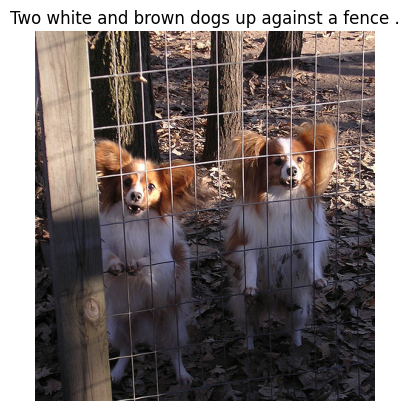

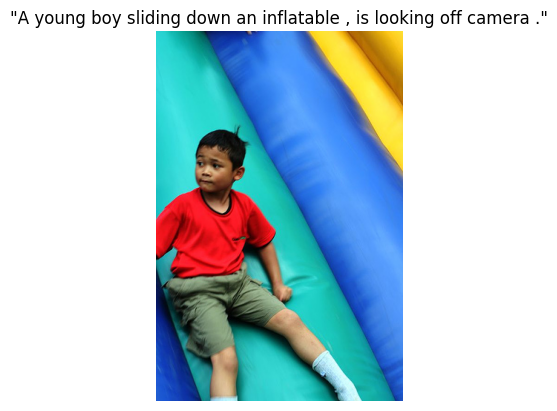

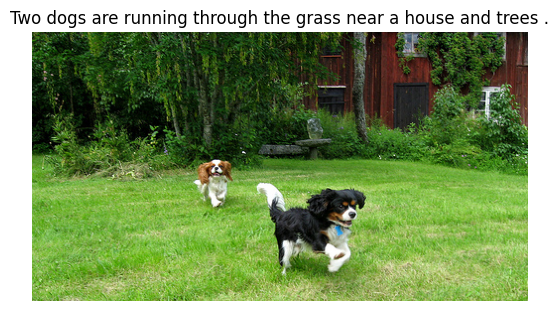

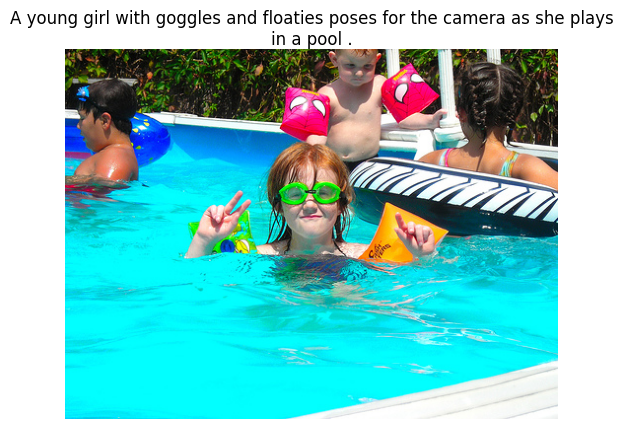

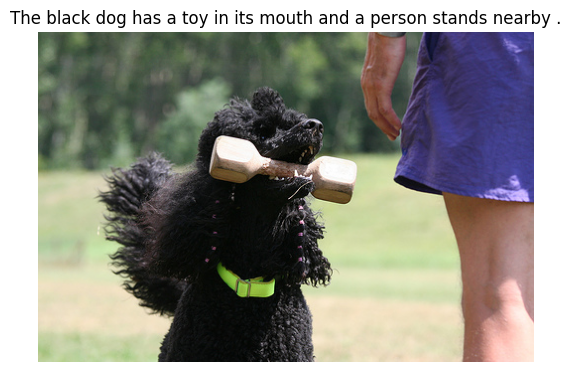

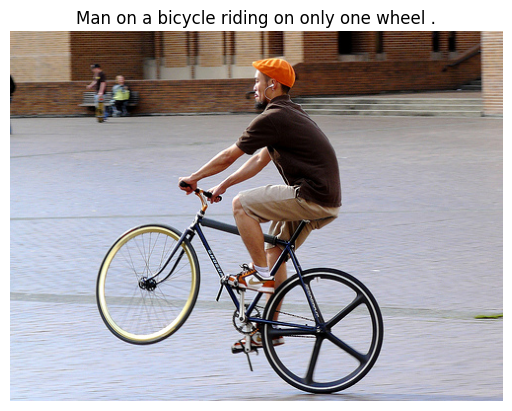

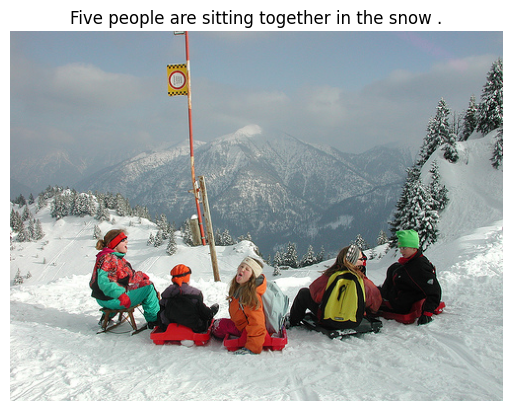

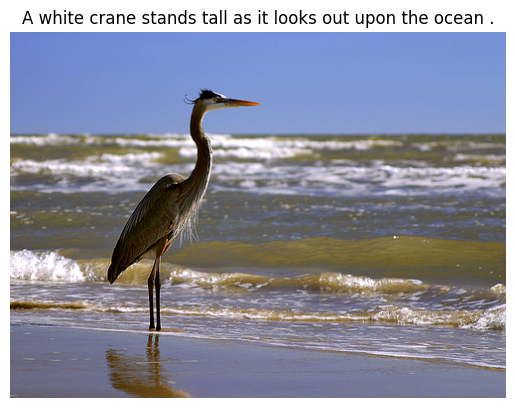

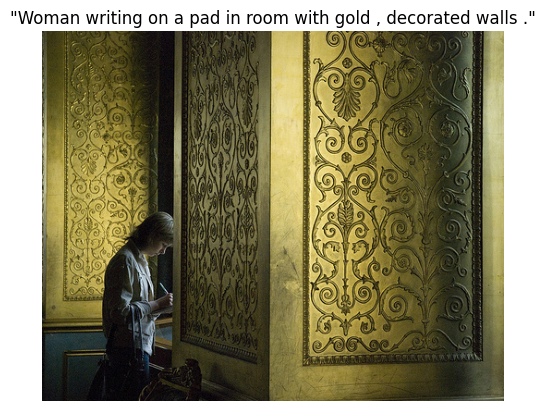

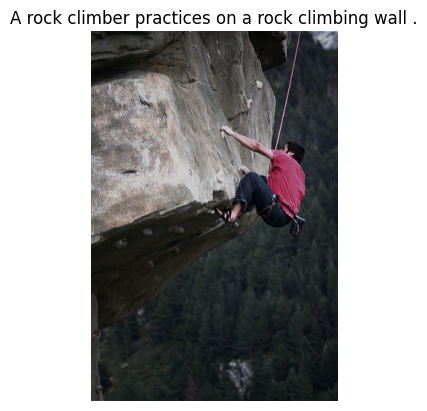

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd

# Assuming 'df' is already loaded as in your code

def display_image_with_caption(image_name, caption):
  """Displays an image with its caption."""
  image_dir = '/content/extracted_content_image_caption/Images'
  image_path = os.path.join(image_dir, image_name)

  try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axis ticks
    plt.title(caption, wrap=True)  # Set caption as title with wrapping
    plt.show()
  except FileNotFoundError:
    print(f"Image file '{image_name}' not found in {image_dir}")


# Display images with captions for the bottom 10 rows of the DataFrame
for index, row in df.tail(10).iterrows():
  display_image_with_caption(row['image_name'], row['caption'])

In [ ]:
import matplotlib.image as mpimg
import os

def get_image_info(image_path):
    """Gets image width, height, and intensity information."""
    img = mpimg.imread(image_path)
    height, width, channels = img.shape  # Get image dimensions
    intensity_mean = img.mean()  # Calculate mean intensity

    print(f"Image: {image_path}")
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")
    print(f"Mean Intensity: {intensity_mean}")


# Get information for the first image in the DataFrame
image_name = df['image_name'].iloc[1]  # Get the image name from the second row (index 1)
image_path = os.path.join('/content/extracted_content_image_caption/Images', image_name)

get_image_info(image_path)

Image: /content/extracted_content_image_caption/Images/1001773457_577c3a7d70.jpg
Width: 500 pixels
Height: 375 pixels
Mean Intensity: 126.68256711111111


In [ ]:
import matplotlib.image as mpimg
import os

def get_image_info(image_path):
    """Gets image width, height, and mean intensity."""
    img = mpimg.imread(image_path)
    height, width, channels = img.shape  # Get image dimensions
    intensity_mean = img.mean()  # Calculate mean intensity
    return width, height, intensity_mean

# Add new columns to the DataFrame for width, height, and intensity
df['width'] = 0
df['height'] = 0
df['mean_intensity'] = 0.0

# Iterate through the DataFrame and get information for each image
for index, row in df.iterrows():
    image_name = row['image_name']
    image_path = os.path.join('/content/extracted_content_image_caption/Images', image_name)
    width, height, intensity_mean = get_image_info(image_path)
    df.loc[index, 'width'] = width  # Update width column
    df.loc[index, 'height'] = height # Update height column
    df.loc[index, 'mean_intensity'] = intensity_mean # Update intensity column

# Display the updated DataFrame (with width, height, and intensity columns)
df.head()

image_name  \
0  1000268201_693b08cb0e.jpg   
1  1001773457_577c3a7d70.jpg   
2  1002674143_1b742ab4b8.jpg   
3  1003163366_44323f5815.jpg   
4  1007129816_e794419615.jpg   

                                             caption  width  height  \
0  A little girl in a pink dress going into a woo...    375     500   
1    Two dogs on pavement moving toward each other .    500     375   
2  Young girl with pigtails painting outside in t...    500     400   
3  man laying on bench holding leash of dog sitti...    500     410   
4  The man with pierced ears is wearing glasses a...    500     461   

   mean_intensity  
0       76.105173  
1      126.682567  
2      159.458462  
3      115.628828  
4      105.385932

Sactter Plot of mean intensity of images

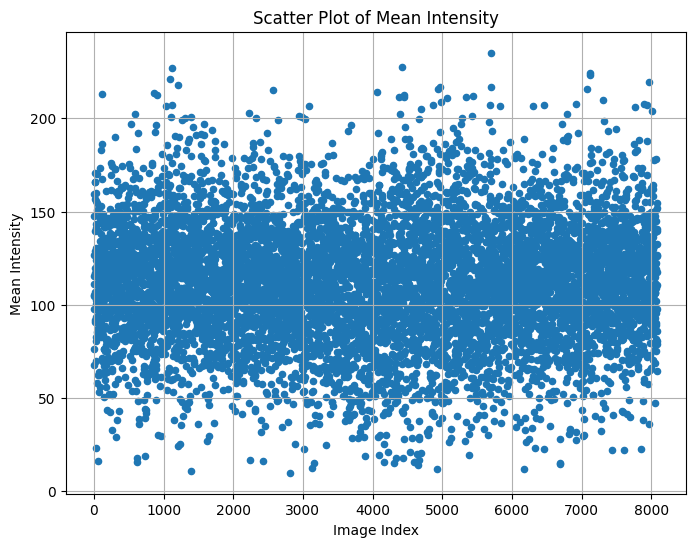

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'mean_intensity' column

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df.index, df['mean_intensity'], marker='o', s=20)  # s is marker size
plt.xlabel("Image Index")
plt.ylabel("Mean Intensity")
plt.title("Scatter Plot of Mean Intensity")
plt.grid(True)
plt.show()

# Feature Extraction using CNN (InceptionV3)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os
import pickle  # Import for saving in pickle format
from google.colab import drive  # Import for Google Drive

# Mount Google Drive
drive.mount('/content/drive')

# Load pre-trained InceptionV3 model (without the classification layer)
base_model = InceptionV3(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

def extract_features(img_path):
    """
    Extracts features from an image using the InceptionV3 model.

    Args:
        img_path (str): Path to the image file.

    Returns:
        numpy.ndarray: Flattened feature vector.
    """
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)  # Preprocessing for InceptionV3
    features = model.predict(x)
    return features.flatten()  # Flatten the features

# Get a list of image files in the directory
image_dir = '/content/extracted_content_image_caption/Images'
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Dictionary to store features for each image
features_dict = {}

# Loop through all image files and extract features
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    features = extract_features(image_path)
    features_dict[image_file] = features  # Store features in the dictionary
    print(f"Features extracted from: {image_path}")

# Optional: Convert the dictionary to a NumPy array if needed
features_array = np.array(list(features_dict.values()))

# Display the shape of the features array
print(f"Shape of features array: {features_array.shape}")

# Specify the directory to save features in Google Drive
save_dir = '/content/drive/My Drive/ExtractedFeatures'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save the features array and the corresponding filenames
np.save(os.path.join(save_dir, 'features.npy'), features_array)

# Save the filenames separately, if needed
with open(os.path.join(save_dir, 'filenames.txt'), 'w') as f:
    for image_file in image_files:
        f.write(f"{image_file}\n")

# Save the features dictionary in pickle format
with open(os.path.join(save_dir, 'features_dict.pkl'), 'wb') as f:
    pickle.dump(features_dict, f)

print(f"Features and metadata saved to: {save_dir}")

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Features extracted from: /content/extracted_content_image_caption/Images/2513260012_03d33305cf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Features extracted from: /content/extracted_content_image_caption/Images/3257107194_f235c8f7ab.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Features extracted from: /content/extracted_content_image_caption/Images/3704995657_e2e114083d.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Features extracted from: /content/extracted_content_image_caption/Images/3079341641_f65f6b0f8b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Features extracted from: /content/extracted_content_image_caption/Images/3239021459_a6b71bb400.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Features extracted from: /content/extracted_content_image_caption/Images/2502007071_82a8c639cf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Features extracted from: /content/extracted_content_image_caption/Images/2993049054_611f9

**Loading Features**

In [14]:
import numpy as np

# Update the file path to match the location in Google Drive
features_file_path = '/content/drive/My Drive/ExtractedFeatures/features.npy'

# Load the features from the .npy file
loaded_features_array = np.load(features_file_path)

print(f"Loaded features shape: {loaded_features_array.shape}")

Loaded features shape: (8091, 12288)


**Loading Features**

In [16]:
import pickle
# Load the features dictionary from the .pkl file
features_dict_file_path = '/content/drive/My Drive/ExtractedFeatures/features_dict.pkl'  # Corrected path to the .pkl file
with open(features_dict_file_path, 'rb') as f:
    loaded_features_dict = pickle.load(f)

# Example: Accessing features for a specific image
first_image = list(loaded_features_dict.keys())[0]
print(f"Features for {first_image}: {loaded_features_dict[first_image].shape}")

Features for 2374247382_023a86b9ca.jpg: (12288,)


# Prepare Captions


In [17]:
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the features dictionary from the .pkl file
features_dict_file_path = '/content/drive/My Drive/ExtractedFeatures/features_dict.pkl'
with open(features_dict_file_path, 'rb') as f:
    loaded_features_dict = pickle.load(f)

# Load the captions DataFrame
df = pd.read_csv('/content/extracted_content_image_caption/captions.txt', delimiter=',')
df.columns = ['image_name', 'caption']

# Tokenize captions
tokenizer = Tokenizer(num_words=10000, oov_token="<unk>", filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(df['caption'])
vocab_size = len(tokenizer.word_index) + 1

# Create sequences and pad them
sequences = tokenizer.texts_to_sequences(df['caption'])
max_length = max(len(s) for s in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Create Input-Output Pairs
inputs = []
outputs = []

for index, row in df.iterrows():
    image_name = row['image_name']
    caption_sequence = row['caption']

    # Get the corresponding features from the loaded features dictionary
    if image_name in loaded_features_dict:
        inputs.append(loaded_features_dict[image_name])
        outputs.append(padded_sequences[index])

# Convert inputs and outputs to NumPy arrays
inputs = np.array(inputs)
outputs = np.array(outputs)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")

Training data shape: (32364, 12288), (32364, 37)
Validation data shape: (8091, 12288), (8091, 37)


# Building and Training RNN Model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(inputs.shape[1],)),  # Input shape based on the features
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.RepeatVector(max_length),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model if needed
model.save('/content/drive/My Drive/ExtractedFeatures/image_captioning_model.h5')

Epoch 1/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.7072 - loss: 2.4816 - val_accuracy: 0.7406 - val_loss: 1.6776
Epoch 2/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - accuracy: 0.7427 - loss: 1.6324 - val_accuracy: 0.7426 - val_loss: 1.6003
Epoch 3/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.7446 - loss: 1.5562 - val_accuracy: 0.7433 - val_loss: 1.5720
Epoch 4/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.7446 - loss: 1.5191 - val_accuracy: 0.7436 - val_loss: 1.5548
Epoch 5/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7464 - loss: 1.4759 - val_accuracy: 0.7439 - val_loss: 1.5367
Epoch 6/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7467 - loss: 1.4530 - val_accuracy: 0.7443 - val_loss: 1.5314
Epoch 7/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7474 - loss: 1.4264 - val_accuracy: 0.7447 - val_loss: 1.5231
Epoch 8/20
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7490 -

In [20]:
!pip install nltk==3.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


In [21]:
import nltk
from nltk.translate.bleu_score import corpus_bleu

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

 # Calculate BLEU score

In [25]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


def generate_caption(image_features):
  """Generates a caption for a given image."""
  in_text = '<start>'
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    yhat = model.predict([image_features], verbose=0)  # Assuming 'model' is your trained model
    yhat = np.argmax(yhat)

    # Check if the predicted index is in the tokenizer's word index
    if yhat in tokenizer.index_word:
      word = tokenizer.index_word[yhat]
    else:
      # Handle the out-of-vocabulary word, e.g., replace with '<unk>'
      word = '<unk>'

    in_text += ' ' + word
    if word == '<end>':
      break
  final = in_text.split()
  final = final[1:-1]
  final = ' '.join(final)
  return final

In [ ]:
# Assuming you have X_val (validation image features) and y_val (validation captions)
actual, predicted = list(), list()

for i in range(len(X_val)):
    yhat = generate_caption(X_val[i].reshape(1, -1))  # Reshape for prediction

    # Preprocess reference captions:
    reference = [d.split() for d in tokenizer.sequences_to_texts([y_val[i]])]

    # Ensure reference and predicted are not empty:
    if reference and reference[0] and yhat:  # Check if not empty
        actual.append(reference)
        predicted.append(yhat.split())
    else:
        print(f"Skipping example {i} due to empty reference or prediction.")

# Calculate BLEU scores for different n-grams (1 to 4)
# Use smoothing to avoid zero scores when there's no n-gram overlap:
smoothing_function = SmoothingFunction().method4

bleu1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothing_function)
bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function)
bleu3 = corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0), smoothing_function=smoothing_function)
bleu4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing_function)

print('BLEU-1: %f' % bleu1)
print('BLEU-2: %f' % bleu2)
print('BLEU-3: %f' % bleu3)
print('BLEU-4: %f' % bleu4)